# Bag of Tricks Figure

Analyze the effects of our different "tricks".

1. Sample matches off mask
2. Scale by hard negatives
3. L2 pixel loss on matches

We will compare standard network, networks missing one trick only, and a network without any tricks (i.e same as Tanner Schmidt)

In [1]:
import numpy as np
import os
import fnmatch
import pandas as pd
import sklearn.metrics as sm
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluationPlotter as DCEP

/home/manuelli/code/modules/dense_correspondence_manipulation/utils/transformations.py:1912: UserWarning: failed to import module _transformations
  warnings.warn('failed to import module %s' % name)


In [2]:
folder_name = "trick_analysis"
path_to_nets = os.path.join("/home/manuelli/code/data_volume/pdc/trained_models", folder_name)
all_nets = sorted(os.listdir(path_to_nets))
nets_to_plot = []
matplotlib.rcParams.update({'font.size': 17})
for net in all_nets:
#     if "no_dr" in net:
#         continue

    
    nets_to_plot.append(os.path.join(folder_name,net))

    
nets_list = []
nets_to_plot = []
nets_list.append("standard_3")
nets_list.append("dont_scale_hard_negatives_3")
nets_list.append("dont_sample_from_mask_3")
nets_list.append("no_tricks_3")


nets_dict = dict()
nets_dict["standard-SO"] = os.path.join(folder_name, "standard_3")
nets_dict["no-hard-neg"] = os.path.join(folder_name, "dont_scale_hard_negatives_3")
nets_dict["no-masking"] = os.path.join(folder_name, "dont_sample_from_mask_3")
nets_dict["Schmidt"] = os.path.join(folder_name, "no_tricks_3")


net_order = ["standard-SO", "no-hard-neg", "no-masking", "Schmidt"]
# print nets_to_plot
print nets_to_plot
# nets_to_plot = ["starbot_1_train_3"]

[]


# Training 

In [3]:
# p = DCEP()
# dc_source_dir = utils.getDenseCorrespondenceSourceDir()

# network_name = nets_to_plot[0]
# path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc", "trained_models", network_name, "analysis/train/data.csv")
# fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

# for network_name in nets_to_plot[1:]:
#     path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc", "trained_models", network_name, "analysis/train/data.csv")
#     fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

# _, axes = fig_axes
# # axes[0].set_title("Training Set")
# plt.show()

# Test

In [4]:
# p = DCEP()
# dc_source_dir = utils.getDenseCorrespondenceSourceDir()

# network_name = nets_to_plot[0]
# path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc", "trained_models", network_name, "analysis/test/data.csv")
# fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

# for network_name in nets_to_plot[1:]:
#     path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc", "trained_models", network_name, "analysis/test/data.csv")
#     fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

# _, axes = fig_axes
# # axes[0].set_title("Test Set")
# plt.show()

## Cross Scene Single Object

pixel match error
x_axis [-0.00419111  0.00419111  0.01257332  0.02095553  0.02933774  0.03771996
  0.04610217  0.05448438  0.06286659  0.07124881  0.07963102  0.08801323
  0.09639544  0.10477766  0.11315987  0.12154208  0.12992429  0.1383065
  0.14668872  0.15507093  0.16345314  0.17183535  0.18021757  0.18859978
  0.19698199  0.2053642   0.21374642  0.22212863  0.23051084  0.23889305
  0.24727527  0.25565748  0.26403969  0.2724219   0.28080412  0.28918633
  0.29756854  0.30595075  0.31433297  0.32271518  0.33109739  0.3394796
  0.34786181  0.35624403  0.36462624  0.37300845  0.38139066  0.38977288
  0.39815509  0.4065373   0.41491951  0.42330173  0.43168394  0.44006615
  0.44844836  0.45683058  0.46521279  0.473595    0.48197721  0.49035943
  0.49874164  0.50712385  0.51550606  0.52388828  0.53227049  0.5406527
  0.54903491  0.55741712  0.56579934  0.57418155  0.58256376  0.59094597
  0.59932819  0.6077104   0.61609261  0.62447482  0.63285704  0.64123925
  0.64962146  0.65800367  0.6

pixel match error
x_axis [-0.00414169  0.00414169  0.01242507  0.02070844  0.02899182  0.0372752
  0.04555857  0.05384195  0.06212533  0.0704087   0.07869208  0.08697546
  0.09525883  0.10354221  0.11182559  0.12010896  0.12839234  0.13667572
  0.14495909  0.15324247  0.16152585  0.16980922  0.1780926   0.18637598
  0.19465936  0.20294273  0.21122611  0.21950949  0.22779286  0.23607624
  0.24435962  0.25264299  0.26092637  0.26920975  0.27749312  0.2857765
  0.29405988  0.30234325  0.31062663  0.31891001  0.32719338  0.33547676
  0.34376014  0.35204351  0.36032689  0.36861027  0.37689365  0.38517702
  0.3934604   0.40174378  0.41002715  0.41831053  0.42659391  0.43487728
  0.44316066  0.45144404  0.45972741  0.46801079  0.47629417  0.48457754
  0.49286092  0.5011443   0.50942767  0.51771105  0.52599443  0.5342778
  0.54256118  0.55084456  0.55912793  0.56741131  0.57569469  0.58397807
  0.59226144  0.60054482  0.6088282   0.61711157  0.62539495  0.63367833
  0.6419617   0.65024508  0.6

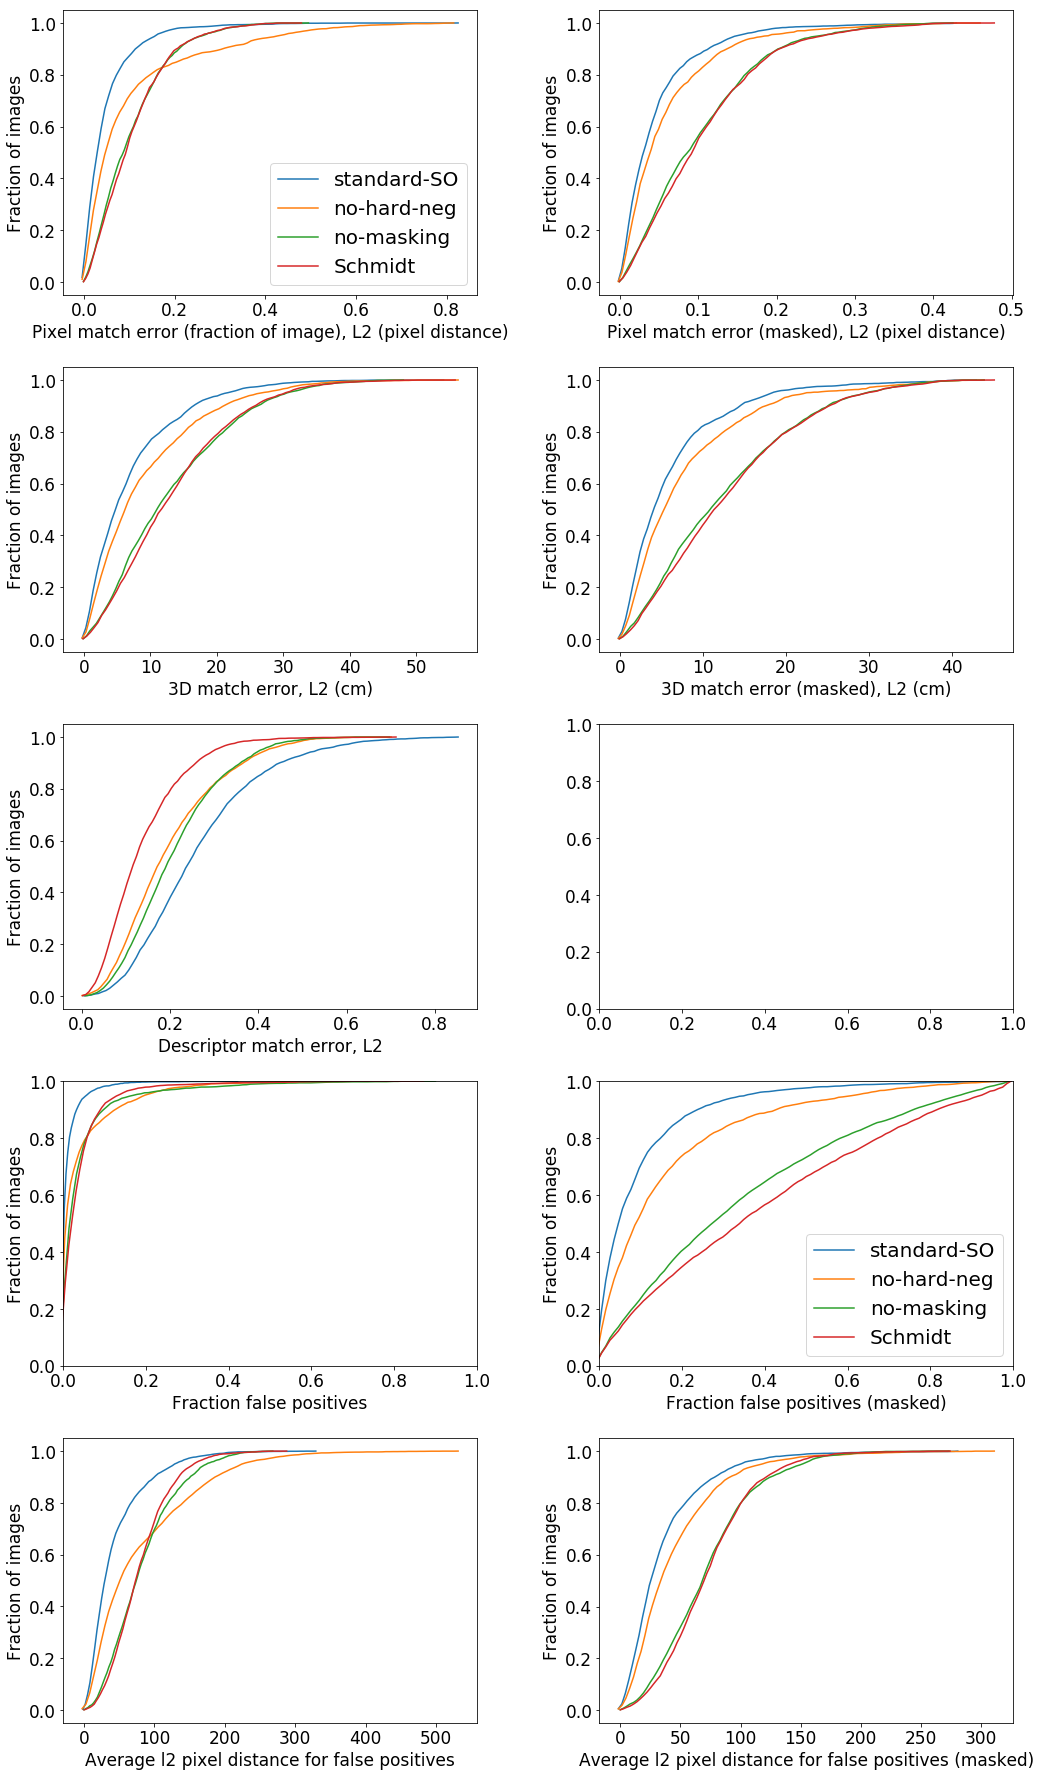

In [5]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

fig_axes = None
for network_name in net_order:
    folder = nets_dict[network_name]
    path_to_csv = os.path.join(dc_source_dir, "data_volume", "pdc", "trained_models", folder, 
                               "analysis/cross_scene/data.csv")
    if fig_axes is None:
        fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)
    else:
        fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)
            
        
fig, axes = fig_axes
fig.tight_layout()

ax = axes[0,0]
ax = ax.legend(prop={'size': 20})
ax = axes[3,1]
ax = ax.legend(prop={'size': 20})
plt.show()



In [ ]:
x_axis = [-0.00419111  0.00419111  0.01257332  0.02095553  0.02933774  0.03771996
  0.04610217  0.05448438  0.06286659  0.07124881  0.07963102  0.08801323
  0.09639544  0.10477766  0.11315987  0.12154208  0.12992429  0.1383065
  0.14668872  0.15507093  0.16345314  0.17183535  0.18021757  0.18859978
  0.19698199  0.2053642   0.21374642  0.22212863  0.23051084  0.23889305
  0.24727527  0.25565748  0.26403969  0.2724219   0.28080412  0.28918633
  0.29756854  0.30595075  0.31433297  0.32271518  0.33109739  0.3394796
  0.34786181  0.35624403  0.36462624  0.37300845  0.38139066  0.38977288
  0.39815509  0.4065373   0.41491951  0.42330173  0.43168394  0.44006615
  0.44844836  0.45683058  0.46521279  0.473595    0.48197721  0.49035943
  0.49874164  0.50712385  0.51550606  0.52388828  0.53227049  0.5406527
  0.54903491  0.55741712  0.56579934  0.57418155  0.58256376  0.59094597
  0.59932819  0.6077104   0.61609261  0.62447482  0.63285704  0.64123925
  0.64962146  0.65800367  0.66638589  0.6747681   0.68315031  0.69153252
  0.69991474  0.70829695  0.71667916  0.72506137  0.73344359  0.7418258
  0.75020801  0.75859022  0.76697244  0.77535465  0.78373686  0.79211907
  0.80050128  0.8088835   0.81726571  0.82564792]

In [6]:
# fig, axes = fig_axes
print type(fig)
folder_name = os.path.join("figures", "tricks_quant_plots")
print folder_name
fig.savefig(os.path.join(folder_name, "tricks_quant_plots_all.pdf"))

<class 'matplotlib.figure.Figure'>
figures/tricks_quant_plots


In [7]:
extent_1 = axes[0,0].get_window_extent()
extent_2 = axes[0,1].get_window_extent()
extent_3 = axes[3,1].get_window_extent()
print extent_1
print extent_2

print "extent_3", extent_3

extent_1.x1 = extent_2.x1
extent_1.y1 = extent_2.y1


print extent_1
extent = extent_1
extent.x0 = 0
extent.x1 = extent.x1 + 30
extent = extent.transformed(fig.dpi_scale_trans.inverted())
fig.savefig( os.path.join(folder_name,"tricks_quant_plots_both.pdf"), bbox_inches=extent.expanded(1,1.2))


extent = axes[0,0].get_window_extent()
extent.x0 = 0
extent.x1 = extent.x1 + 30
extent.y0 = extent.y0 - 45
extent = extent.transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(folder_name, "tricks_quant_plots_single.pdf"), bbox_inches=extent.expanded(1,1))


extent = axes[3,1].get_window_extent()
extent.x0 = extent.x0 - 33
extent.x1 = extent.x1 + 15
extent.y0 = extent.y0 - 45
extent.y1 = extent.y1 + 10
extent = extent.transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join(folder_name, "tricks_fraction_false_positives.pdf"), bbox_inches=extent.expanded(1,1))



Bbox(x0=70.985, y0=1489.972, x1=491.582428977, y1=1781.64)
Bbox(x0=607.15265625, y0=1489.972, x1=1027.75008523, y1=1781.64)
extent_3 Bbox(x0=607.15265625, y0=418.888, x1=1027.75008523, y1=710.556)
Bbox(x0=70.985, y0=1489.972, x1=1027.75008523, y1=1781.64)


# Separating Distinct Objects

In [8]:
# p = DCEP()
# dc_source_dir = utils.getDenseCorrespondenceSourceDir()

# analysis_folder = analysis_folders[0]
# path_to_csv = os.path.join(model_folder, analysis_folder, 
#                            "across_object/data.csv")
# fig_axes = DCEP.run_on_single_dataframe_across_objects(path_to_csv, label=analysis_folder, save=False)

# for analysis_folder in analysis_folders[1:]:
#     path_to_csv = os.path.join(model_folder, 
#                                analysis_folder, "across_object/data.csv")
#     fig_axes = DCEP.run_on_single_dataframe_across_objects(path_to_csv, label=analysis_folder, previous_fig_axes=fig_axes, save=False)

# _, axes = fig_axes
# # axes[0].set_title("Across Object")
# plt.show()